<a href="https://colab.research.google.com/github/jfdoppler/DNL_1c2021/blob/main/03_euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración I

## Método de Euler


Supongamos que tenemos una ecuación diferencial de esta forma:
$$
\frac{dx}{dt} = f(x, t)
$$

El método de Euler consiste en aproximar la derivada por el cociente incremental: $\frac{dx}{dt} \simeq \frac{\Delta x}{\Delta t}$:

$$
\frac{x(t+\Delta t) - x(t)}{\Delta t} = f(x, t)
$$

$$
x(t+\Delta t) = x(t)+f(x, t)\Delta t
$$

Con lo que conseguimos una regla que prescribe el valor siguiente de la función x siguiente en función de la condición inicial y del valor de la derivada.

#### Ejemplo
Integremos el modelo de Gompertz (ej. 3 de la guía 1)

$$
\dot{N} = -aNln(bN)
$$

$$
\frac{N(t + \Delta t) - N(t)}{\Delta t} = -aN(t) ln(bN(t))
$$

$$
N(t + \Delta t) = N(t) -aN(t) ln(bN(t))\Delta t
$$

Noten que para resolver esto tenemos que definir, además de la condición incial, cual es el paso temporal. Qué les parece que puede pasar si cambiamos este valor?

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

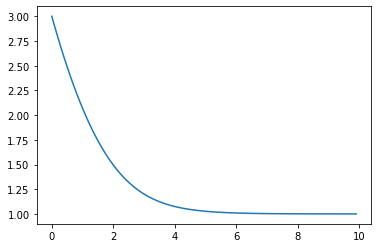

In [ ]:
# Definimos un paso temporal
dt = 0.1
# Y un vector de tiempos
t = np.arange(0, 10, step=dt)
# Le damos valores a los parámetros de las ecuaciones
a = 1
b = 1
# Nos armamos un vector donde vamos a ir guardando los resultados de la integración
N = np.zeros_like(t)
# Fijamos una condición inicial, dandole valor al primer punto
N[0] = 3
for i in range(len(t)-1):
    # Calculamos el siguiente punto usando el método de Euler (t -> i ; t+dt -> i+1)
    N[i + 1] = -a*np.log(b*N[i]) * dt + N[i]

plt.plot(t, N)

En general, si uno usa Euler tiene que calibrar con cuidado el paso temporal, para asegurarse de que no está haciendo cualquier cosa.

Una forma de hacer esto es hacer la integración para pasos temporales sucesivamente menores, hasta notar (con algún criterio) que la integración no cambia al refinar el paso temporal.

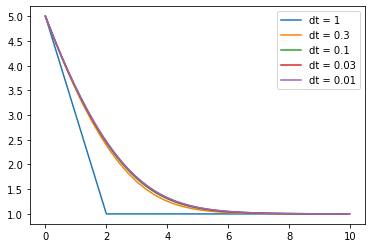

In [ ]:
varios_dt = [1, 0.3, 0.1, 0.03, 0.01]
for dt in varios_dt:
    # Para cada paso de integración hacemos el proceso
    t = np.arange(0, 10, step=dt)
    a = 1
    b = 1
    N = np.zeros_like(t)
    # Fijamos una condición inicial, dandole valor al primer punto
    N[0] = 5
    for i in range(len(t)-1):
        # Calculamos el siguiente punto usando el método de Euler (t -> i ; t+dt -> i+1)
        N[i + 1] = -a*np.log(b*N[i]) * dt + N[i]
    # Le agregamos una etiqueta a cada curva para saber que dt le correspondía
    plt.plot(t, N, label='dt = {}'.format(dt))
plt.legend()